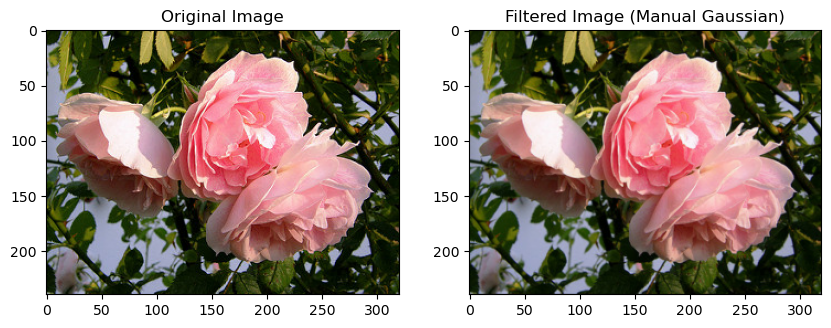

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Create the Gaussian kernel
def create_gaussian_kernel(size, sigma):
    """Create a Gaussian kernel."""
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma**2)) * 
                     np.exp(-((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

# Manually apply the Gaussian filter
def apply_gaussian_filter_manual(image, kernel):
    """Manually apply Gaussian filter to the image."""
    pad_width = kernel.shape[0] // 2
    padded_image = np.pad(image, ((pad_width, pad_width), (pad_width, pad_width)), mode='constant', constant_values=0)  # Fix padding
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):  # Iterate over the height of the image
        for j in range(image.shape[1]):  # Iterate over the width of the image
            # Apply kernel on each pixel in the neighborhood
            filtered_image[i, j] = np.sum(
                padded_image[i:i+kernel.shape[0], j:j+kernel.shape[1]] * kernel
            )
    
    return filtered_image

# Load a sample image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB if needed

# Create the Gaussian kernel
kernel = create_gaussian_kernel(3, 0.5)

# Apply manual Gaussian filter to each channel (R, G, B) using numpy
R_channel_manual = apply_gaussian_filter_manual(image[:, :, 0], kernel)
G_channel_manual = apply_gaussian_filter_manual(image[:, :, 1], kernel)
B_channel_manual = apply_gaussian_filter_manual(image[:, :, 2], kernel)

# Combine the filtered channels back into an image
filtered_image_manual = np.stack([R_channel_manual, G_channel_manual, B_channel_manual], axis=2)

# Plot the original and filtered images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image_manual)
plt.title('Filtered Image (Manual Gaussian)')

plt.show()
